<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


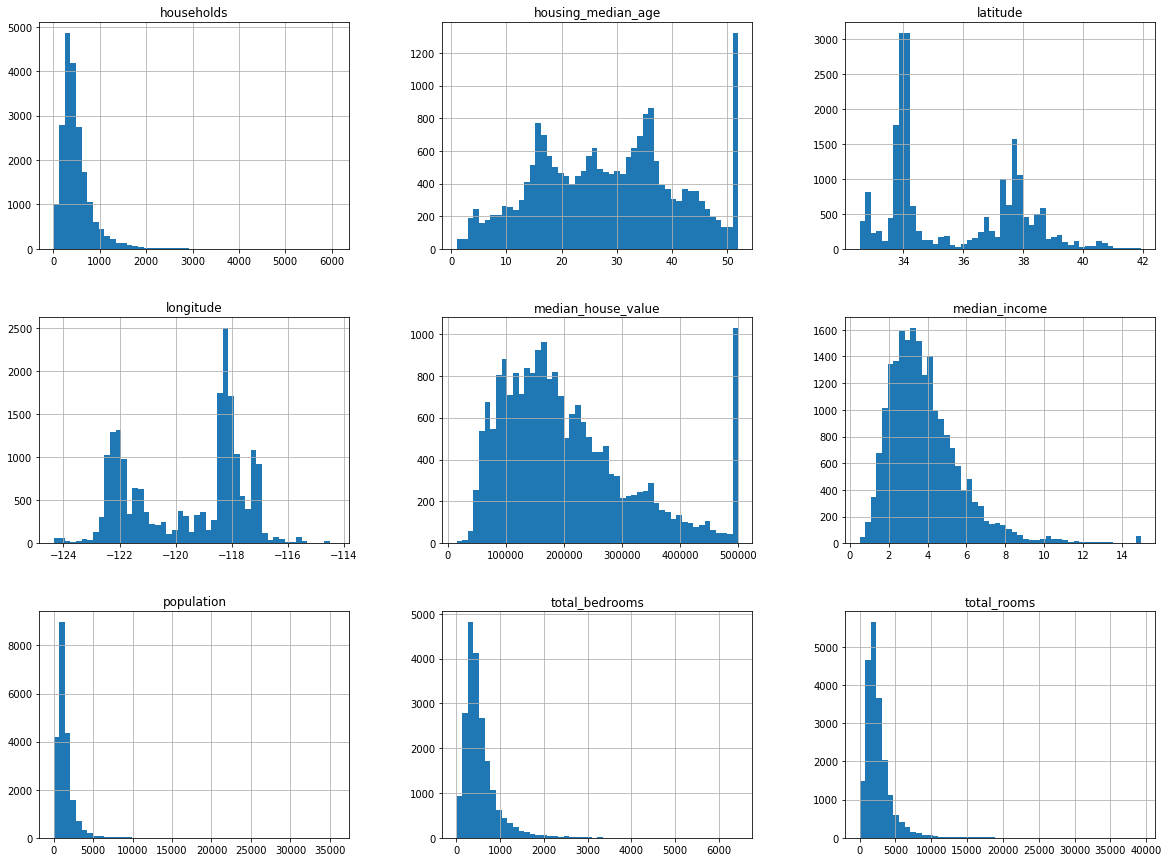

In [11]:

import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()



def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


#Some methods in pandas to get into
housing = load_housing_data()
housing.head()
housing.info()
housing["ocean_proximity"].value_counts()
housing.describe()

#Now to Plot some histograms to get a feeling of the data

housing.hist(bins=50, figsize=(20,15)) 
plt.show()


In [12]:
#Now to subset the data into training and test

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #Creates a list of indices for subsetting
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

split_train_test(housing, 0.2)

[ 3571 15223 17209 ...  1579 18370  6176]
4128
[ 3571 15223 17209 ...  6943  4542  6944]
[18741 20319 18490 ...  1579 18370  6176]


(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 18741    -122.35     40.57                18.0       2226.0           490.0   
 20319    -119.17     34.25                15.0       1329.0           282.0   
 18490    -121.61     37.03                 5.0       6529.0          1010.0   
 16910    -122.36     37.56                32.0       4684.0           540.0   
 16270    -121.24     37.95                36.0        361.0            63.0   
 13495    -117.35     34.17                28.0       1905.0           372.0   
 18161    -122.05     37.36                29.0       1733.0           255.0   
 17889    -121.95     37.41                13.0       2164.0           412.0   
 12162    -117.11     33.75                17.0       4174.0           851.0   
 11238    -117.96     33.82                29.0       2176.0           468.0   
 5848     -118.31     34.18                11.0       3112.0           890.0   
 9320     -122.53     37.97             